In [1]:
import cv2
import mediapipe as mp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义可视化图像函数
def look_img(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

##### 导入模型

In [3]:
#导入solution
mp_pose = mp.solutions.pose

#导入绘图函数
mp_drawing = mp.solutions.drawing_utils

#导入模型
pose = mp_pose.Pose(
    static_image_mode=True,         #是静态图片还是连续视频帧
    model_complexity=2,             #选择人体姿势关键点检测模型，0性能差但是快，2性能好但是慢，1介于两者之间
    smooth_landmarks=True,          #是否平滑关键点
    enable_segmentation=True,       #是否人体抠图
    smooth_segmentation=True,
    min_detection_confidence=0.5,   #置信度阈值
    min_tracking_confidence=0.5,    #追踪阈值
)

##### 读入图像，输入模型，获取预测结果

In [4]:
img = cv2.imread('test.jpg')

img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

In [5]:
results

mediapipe.python.solution_base.SolutionOutputs

##### 人体抠像结果

In [6]:
mask = results.segmentation_mask

In [7]:
mask.shape

(1920, 1280)

In [8]:
img.shape

(1920, 1280, 3)

In [9]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
mask = mask > 0.5

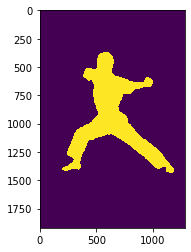

In [11]:
plt.imshow(mask)
plt.show()

In [13]:
import numpy as np
# 单通道转三通道
mask_3 = np.stack((mask,mask,mask),axis=-1)

MASK_COLOR = [0,200,0]
fg_image = np.zeros(img.shape,dtype=np.uint8)
fg_image[:] = MASK_COLOR

#获取前景人像
FG_img = np.where(mask_3,img,fg_image)

#获取扣掉前景人像的背景
BG_img = np.where(~mask_3,img,fg_image)

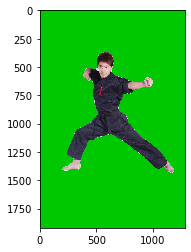

In [14]:
look_img(FG_img)

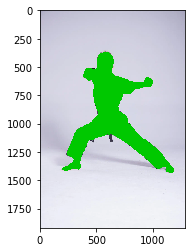

In [15]:
look_img(BG_img)

##### 所有关键点检测结果

In [16]:
results.pose_landmarks

landmark {
  x: 0.43170350790023804
  y: 0.2775278091430664
  z: -0.6325309872627258
  visibility: 1.0
}
landmark {
  x: 0.4449617266654968
  y: 0.263005793094635
  z: -0.6008321642875671
  visibility: 0.9999998807907104
}
landmark {
  x: 0.45448416471481323
  y: 0.26234424114227295
  z: -0.6012418270111084
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4647213816642761
  y: 0.26203110814094543
  z: -0.6008548140525818
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4234493374824524
  y: 0.2638671398162842
  z: -0.5768621563911438
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4170674681663513
  y: 0.26340895891189575
  z: -0.5773522257804871
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4112139344215393
  y: 0.26276418566703796
  z: -0.5774286985397339
  visibility: 0.9999998807907104
}
landmark {
  x: 0.47898226976394653
  y: 0.263754665851593
  z: -0.37337642908096313
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4128172993659973
  y: 0.261045128107070

In [17]:
mp_pose.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [18]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.6337472796440125
y: 0.34789329767227173
z: -0.7948378920555115
visibility: 0.9999284744262695

In [19]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13]

x: 0.6337472796440125
y: 0.34789329767227173
z: -0.7948378920555115
visibility: 0.9999284744262695

In [20]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13].x

0.6337472796440125

##### 解析指定关键点的像素坐标

In [21]:
img.shape

(1920, 1280, 3)

In [22]:
h = img.shape[0]
w = img.shape[1]

In [23]:
# 左胳膊肘关键点像素坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x *w

811.1965179443359

In [24]:
# 左胳膊肘关键点像素坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y *h

667.9551315307617

##### 解析指定关键点的真实物理(米)坐标

###### 真实物理坐标的原点位于左右髋关节连线的中点(肚脐附近)

In [25]:
results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE]

x: -0.10905410349369049
y: -0.5750669240951538
z: -0.4026825726032257
visibility: 1.0

In [26]:
results.pose_world_landmarks.landmark[23]

x: 0.09511511772871017
y: 0.001764865592122078
z: -0.02278193272650242
visibility: 0.999809205532074

##### 交互式三维可视化

In [27]:
import numpy as np

In [28]:
coords = np.array(results.pose_landmarks.landmark)

In [29]:
coords

array([x: 0.43170350790023804
y: 0.2775278091430664
z: -0.6325309872627258
visibility: 1.0
,
       x: 0.4449617266654968
y: 0.263005793094635
z: -0.6008321642875671
visibility: 0.9999998807907104
,
       x: 0.45448416471481323
y: 0.26234424114227295
z: -0.6012418270111084
visibility: 0.9999998807907104
,
       x: 0.4647213816642761
y: 0.26203110814094543
z: -0.6008548140525818
visibility: 0.9999998807907104
,
       x: 0.4234493374824524
y: 0.2638671398162842
z: -0.5768621563911438
visibility: 0.9999998807907104
,
       x: 0.4170674681663513
y: 0.26340895891189575
z: -0.5773522257804871
visibility: 0.9999998807907104
,
       x: 0.4112139344215393
y: 0.26276418566703796
z: -0.5774286985397339
visibility: 0.9999998807907104
,
       x: 0.47898226976394653
y: 0.263754665851593
z: -0.37337642908096313
visibility: 0.9999998807907104
,
       x: 0.4128172993659973
y: 0.2610451281070709
z: -0.26836198568344116
visibility: 0.9999998807907104
,
       x: 0.4487845003604889
y: 0.28870365023

In [30]:
len(coords)

33

In [31]:
coords[0].x

0.43170350790023804

In [32]:
# 在不用耗时循环的条件下，汇总所有点的XYZ坐标
def get_X(each):
    return each.x
def get_Y(each):
    return each.y
def get_Z(each):
    return each.z

#分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_X,coords)))
points_y = np.array(list(map(get_Y,coords)))
points_z = np.array(list(map(get_Z,coords)))

#将三个方向的坐标合并
points = np.vstack((points_x,points_y,points_z)).T 

In [33]:
points.shape

(33, 3)

In [34]:
points

array([[ 0.43170351,  0.27752781, -0.63253099],
       [ 0.44496173,  0.26300579, -0.60083216],
       [ 0.45448416,  0.26234424, -0.60124183],
       [ 0.46472138,  0.26203111, -0.60085481],
       [ 0.42344934,  0.26386714, -0.57686216],
       [ 0.41706747,  0.26340896, -0.57735223],
       [ 0.41121393,  0.26276419, -0.5774287 ],
       [ 0.47898227,  0.26375467, -0.37337643],
       [ 0.4128173 ,  0.26104513, -0.26836199],
       [ 0.4487845 ,  0.28870365, -0.54516339],
       [ 0.42330608,  0.28781006, -0.51855785],
       [ 0.54171491,  0.33605412, -0.31664175],
       [ 0.39983457,  0.30583027,  0.01618937],
       [ 0.63374728,  0.3478933 , -0.79483789],
       [ 0.35226259,  0.27793515,  0.40239   ],
       [ 0.7336365 ,  0.33982867, -1.40575004],
       [ 0.32424283,  0.28443038,  0.81320727],
       [ 0.76139033,  0.33223721, -1.48966694],
       [ 0.31653661,  0.29665729,  0.87681949],
       [ 0.74714476,  0.32614559, -1.55317128],
       [ 0.32609847,  0.29960659,  0.869

In [39]:
import open3d
point_cloud = open3d.geometry.PointCloud()
point_cloud.points = open3d.utility.Vector3dVector(points)
open3d.visualization.draw_geometries([point_cloud])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
